In [18]:
#We are going to compare the rides fare of Uber and Lyft

In [105]:


import import_ipynb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data  visualization
%matplotlib inline
import seaborn as sns # advance data visualization
from datetime import datetime # to convert the timestamp into day, time etc
import warnings
warnings.filterwarnings('ignore')

In [106]:
cab_df = pd.read_csv("cab_rides.csv")
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [107]:
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


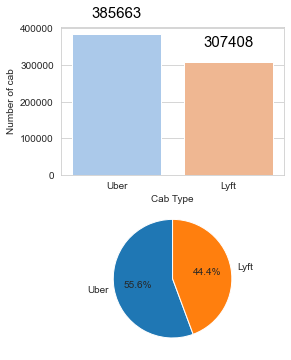

In [108]:
sns.set_style('whitegrid')
f, axes = plt.subplots (2,1, figsize=(4,6))

#histogram
x=['Uber','Lyft']
y = [cab_df.cab_type[(cab_df.cab_type)=='Uber'].count(),\
     cab_df.cab_type[(cab_df.cab_type)=='Lyft'].count()]

vis1= sns.barplot(x,y,palette='pastel',ax=axes[0])
vis1.set(xlabel='Cab Type',ylabel='Number of cab')


for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 20),
                 textcoords='offset points')
        
        
#Pie
Ncab_type = [cab_df.cab_type[(cab_df.cab_type)=='Uber'].count(),\
             cab_df.cab_type[(cab_df.cab_type)=='Lyft'].count()]
     
cab_type = ['Uber','Lyft']

plt.pie(Ncab_type, labels=cab_type, startangle=90, autopct='%.1f%%')


plt.show()        

In [109]:
#Uber gets a more rides compared to Lyft in this particular dataset

In [110]:
Taxi=cab_df[cab_df.name == 'Taxi'].index
cab_df.drop(Taxi , inplace=True)
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


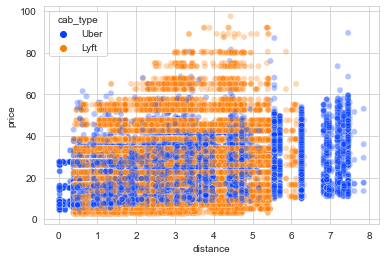

In [111]:

vis1=sns.scatterplot(x=cab_df.distance,y=cab_df.price,data=cab_df, hue=cab_df.cab_type, palette = 'bright',hue_order=cab_type, alpha=0.3,legend='full')



In [112]:
#Before showing a general price vs distance chart, drop 'Taxi' from Uber cabs as they use a different fare structure 
#(in the dataset Taxi fare is always 0 USD) Based on the chart above,
#it can be observed that Lyft has a lower minimum fare compared to Uber,
#at the same time Lyft has higher maximum fare. Also, Uber travel distances are generally higher than Lyft.

In [113]:
#We also know there is a 'surge multiplier' factor in Lyft,
#where the fare is multiplied by a certain rate during rush hours.

In [114]:
#When prices surge , Uber does not show a multiplier and instead quotes only the higher price up front. 
#Lyft marks up its Prime Time pricing with a percentage: If the rate is 50 percent,
#a fare that would normally be USD10 costs USD15. [source] 
#This will be verified with the visualization below:

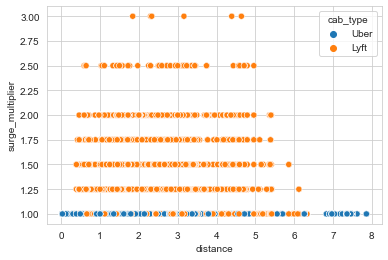

In [115]:
vis1=sns.scatterplot(x=cab_df.distance,y=cab_df.surge_multiplier,data=cab_df, hue=cab_df.cab_type, hue_order=cab_type)

In [116]:
#Let's make a quick investigation on the surge trend for Lyft:

In [117]:
LyftOnly=cab_df[cab_df.cab_type == 'Lyft']
A=LyftOnly.groupby(['name','surge_multiplier'],as_index=False).count()
A.head()

,name,surge_multiplier,distance,cab_type,time_stamp,destination,source,price,id,product_id
0,Lux,1.00,47040,47040,47040,47040,47040,47040,47040,47040
1,Lux,1.25,2217,2217,2217,2217,2217,2217,2217,2217
2,Lux,1.50,1013,1013,1013,1013,1013,1013,1013,1013
3,Lux,1.75,484,484,484,484,484,484,484,484
4,Lux,2.00,481,481,481,481,481,481,481,481


In [118]:
#Except "Shared" type Lyft, most of the Lyft cbs shows a similar number of "surge multiplier" occurence.
#Chart below will show a rough idea on the occurence rate.

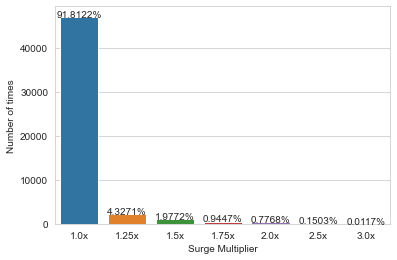

In [119]:
A[:][22:29]
B=A[22:29]['id']
Surge = B
     
Surge_Factor = ['1.0x','1.25x','1.5x','1.75x','2.0x','2.5x','3.0x']

vis1= sns.barplot(x=Surge_Factor,y=B)
vis1.set(xlabel='Surge Multiplier',ylabel='Number of times')

total=sum(B/100)
for p in vis1.patches:
     height = p.get_height()
     vis1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}%'.format(height/total),
            ha="center") 

plt.show()

In [120]:
#About 92% of the time, surge does not happen. about 4% 1.25x surge multiplier happens to the fare,
#2% for 1.5x surge multiplier and so on. 
#In this case I will multiply the surge multiplier to the initial estimated fare, 
#to show the actual price for Lyft rides.

In [121]:
cab_df2=cab_df.copy()

for i in (list(cab_df2.index.values)):
    if cab_df2.cab_type[i]=='Uber': 
        pass
    elif (cab_df2.cab_type[i]=='Lyft') & (cab_df2.surge_multiplier[i]!=1.0):
        cab_df2.price[i]=(cab_df2.price[i] * cab_df2.surge_multiplier[i])

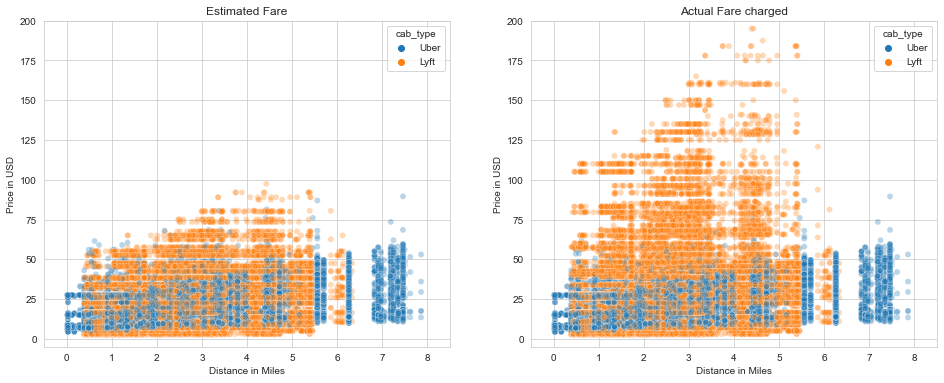

In [122]:
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1=sns.scatterplot(x=cab_df.distance,y=cab_df.price,data=cab_df, hue=cab_df.cab_type, hue_order=cab_type,alpha=0.3, ax=axes[0])

vis2=sns.scatterplot(x=cab_df2.distance,y=cab_df2.price,data=cab_df2, hue=cab_df2.cab_type, hue_order=cab_type, alpha=0.3,ax=axes[1])

vis1.set(xlim=(-0.5, 8.5))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.5, 8.5))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')


axes[0].set_title('Estimated Fare')
axes[1].set_title('Actual Fare charged')

plt.ioff()

In [123]:
#After multiplying with the surge multiplier, Lyft fare shows higher range of fare.
#Does this means Uber has a better fare rate? The answer is No. We'll prove it in the coming visualizations. 
#First, let's break down into the types of rides both companies have. 
#As we know there are normal rides, carpool rides, SUV rides, luxury rides etc....each has a different rate.

AttributeError: 'bool' object has no attribute 'all'

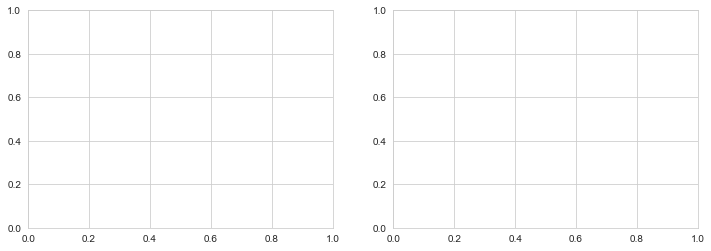

In [124]:
h, axes = plt.subplots (1,2, figsize=(12,4))

Ux=cab_df.name[cab_df.cab_type=='Uber'].unique()
Lx=cab_df.name[cab_df.cab_type=='Lyft'].unique()
Uy = cab_df.name[cab_df.name=='UberXL'].count(),cab_df.name[cab_df.name=='Black'].count(),\
     cab_df.name[cab_df.name=='UberX'].count(),cab_df.name[cab_df.name=='WAV'].count(),\
     cab_df.name[cab_df.name=='Black SUV'].count(),cab_df.name[cab_df.name=='UberPool'].count()

Ly=cab_df.name[cab_df.name=='Shared'].count(),cab_df.name[cab_df.name=='Lux'].count(),\
     cab_df.name[cab_df.name=='Lyft'].count(),cab_df.name[cab_df.name=='Lux Black XL'].count(),\
     cab_df.name[cab_df.name=='Lyft XL'].count(),cab_df.name[cab_df.name=='Lux Black'].count()


vis1= sns.barplot(x=Uy,y=Ux,palette='pastel',ax=axes[0])
vis2= sns.barplot(x=Ly,y=Lx,palette='pastel',ax=axes[1])

axes[0].set_title('Number of Uber Rides')
axes[1].set_title('Number of Lyft Rides')
plt.ioff()



In [ ]:
#The dataset has equal number of ride types for both company, 
#with Uber having roughly 5000 more rides than Lyft for each category. 
#Next we will look at the fare for each category.

In [ ]:
LyftOnly2=cab_df2[cab_df2.cab_type == 'Lyft']
UberOnly=cab_df2[cab_df2.cab_type == 'Uber']

g, axes = plt.subplots (1,2, figsize=(16,6))

vis1=sns.scatterplot(x=LyftOnly2.distance,y=LyftOnly2.price,data=LyftOnly2, hue=LyftOnly.name, ax=axes[1])
vis2=sns.scatterplot(x=UberOnly.distance,y=UberOnly.price,data=UberOnly, hue=UberOnly.name, ax=axes[0])

vis1.set(xlim=(-0.5, 8.5))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.5, 8.5))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')


axes[1].set_title('Lift Fare vs Distance by car type')
axes[0].set_title('Uber Fare vs Distance by car type')
plt.ioff()

In [ ]:
#Unfortunately the chart looks a little messy and it is difficult to compare, 
#so let's further break down the types of rides. 
#Based on some online results, we can say the following for both competiting company rides:

In [ ]:
#Lyft vs Uber

#Lyft ordinary ride fare is comparable to UberX
#Lux Black XL is comparable to Black SUV
#Lyft XL is comparable to UberXL
#Shared is comparable to UberPool

In [ ]:
#At the same time, we will join the intersection of Lyft and Uber rides that shares the same time frame
#(timestamp) and source & destination. 
#This way it is a fair comparison as we are comparing the exact time/weather/traffic condition from both company.

In [ ]:
Join_TDS=UberOnly.merge(LyftOnly2, how='inner',on=['time_stamp','destination','source'])

In [ ]:
Join_TDS = Join_TDS.drop(columns=["id_x","product_id_x","id_y","product_id_y","surge_multiplier_x","surge_multiplier_y"])

In [ ]:
#Further drop other rides that are hard to compare: WAV= wheelchar accessible 
#(Uber) that is not specified in Lyft Uber Black which I am not sure to compare with Lyft Lux or Lyft Lux Black

In [ ]:
A=Join_TDS[Join_TDS.name_x == 'WAV'].index
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_x == 'Black'].index
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_y == 'Lux'].index                
Join_TDS.drop(A , inplace=True)
A=Join_TDS[Join_TDS.name_y == 'Lux Black'].index                
Join_TDS.drop(A , inplace=True)

In [ ]:
g, axes = plt.subplots (1,2, figsize=(16,6))

U1=['UberX','Black SUV','UberXL','UberPool']
L1=['Lyft','Lux Black XL','Lyft XL','Shared']

vis1=sns.scatterplot(x=Join_TDS.distance_x,y=Join_TDS.price_x,data=Join_TDS,hue='name_x',hue_order=U1,ax=axes[0])
vis2=sns.scatterplot(x=Join_TDS.distance_y,y=Join_TDS.price_y,data=Join_TDS,hue='name_y',hue_order=L1,ax=axes[1])

vis1.set(xlim=(-0.2, 7))
vis1.set(ylim=(-5, 200))
vis2.set(xlim=(-0.2, 7))
vis2.set(ylim=(-5, 200))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis1.set_title('Grab Ride')
vis2.set_title('Lyft Ride')

plt.ioff()

In [ ]:
#It looks like our first observation still stands, Lyft has a bigger range of fare rate,
#at the same time lower minumum charge. Let's zoom both chart to the majority data located,
#which is price below 50 USD

In [ ]:
sns.set_style('whitegrid')
g, axes = plt.subplots (2,2, figsize=(14,10))


U1=['UberX','Black SUV','UberXL','UberPool']
L1=['Lyft','Lux Black XL','Lyft XL','Shared']

vis1=sns.scatterplot(x=Join_TDS.distance_x,y=Join_TDS.price_x,data=Join_TDS,hue='name_x',hue_order=U1,ax=axes[1,0])
vis2=sns.scatterplot(x=Join_TDS.distance_y,y=Join_TDS.price_y,data=Join_TDS,hue='name_y',hue_order=L1,ax=axes[1,1])

vis1.set(xlim=(-0.2, 7))
vis1.set(ylim=(-5, 50))
vis2.set(xlim=(-0.2, 7))
vis2.set(ylim=(-5, 50))
vis1.set(xlabel='Distance in Miles',ylabel='Price in USD')
vis2.set(xlabel='Distance in Miles',ylabel='Price in USD')



Ux=['UberX', 'Black SUV', 'UberXL', 'UberPool']
Lx=['Lyft', 'Lux Black XL', 'Lyft XL', 'Shared']
Uy = Join_TDS.name_x[Join_TDS.name_x=='UberX'].count(),Join_TDS.name_x[Join_TDS.name_x=='Black SUV'].count(),\
     Join_TDS.name_x[Join_TDS.name_x=='UberXL'].count(),Join_TDS.name_x[Join_TDS.name_x=='UberPool'].count()

Ly=Join_TDS.name_y[Join_TDS.name_y=='Lyft'].count(),Join_TDS.name_y[Join_TDS.name_y=='Lux Black XL'].count(),\
     Join_TDS.name_y[Join_TDS.name_y=='Lyft XL'].count(),Join_TDS.name_y[Join_TDS.name_y=='Shared'].count()

vis3= sns.barplot(Ux,Uy,ax=axes[0,0])

vis4= sns.barplot(Lx,Ly,ax=axes[0,1])


for p in vis3.patches:
             vis3.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 6),
                 textcoords='offset points')
for p in vis4.patches:
             vis4.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='gray', xytext=(0, 6),
                 textcoords='offset points')
        
plt.ioff()


axes[0,0].set_title('Number of Uber Rides')
axes[0,1].set_title('Number of Lyft Rides')
plt.ioff()


plt.legend(bbox_to_anchor=(0.8,0.25))

plt.ioff()

In [ ]:
#For shared ride ("Shared" for Lyft and "Uberpool' for Uber),
#Lyft has a cheaper rate compared to Uber.
#For other rides, both sides looks similar pretty similar and it is difficult to tell which one is cheaper yet.
#So, a boxplot of price per mile travelled vs ride type is plotted:

In [ ]:
list(Join_TDS.columns.values)
A = Join_TDS[['time_stamp',
 'destination','source',
'distance_x', 'cab_type_x', 'price_x', 'name_x']]

A.columns=['time_stamp',
 'destination','source',
'distance', 'cab_type', 'price', 'name']

B = Join_TDS[['time_stamp',
 'destination','source',
'distance_y', 'cab_type_y', 'price_y', 'name_y']]

B.columns=['time_stamp',
 'destination','source',
'distance', 'cab_type', 'price', 'name']
FPM=A.append(B)

In [ ]:
FPM['fare_per_mile']= round(FPM.price/FPM.distance,2)

In [ ]:
O1=['UberX', 'Black SUV', 'UberXL', 'UberPool', 'Lyft', 'Lux Black XL',
        'Lyft XL','Shared']

import matplotlib as mpl
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))

vis1 = sns.boxplot( data = FPM, x = 'name', y = 'fare_per_mile', \
                   showfliers=False, hue='cab_type',order=O1,palette='Set3')


vis1.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
vis1.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

vis1.set_title('Fare($) Per Mile')
vis1.set(xlabel='Cab Type',ylabel='Fare ($) Per Mile')

vis1.grid(b=True, which='major', color='w', linewidth=1)
vis1.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.ioff()

In [ ]:
#Lyft has a better rate for carpool category. Lyft XL has a slightly lower fare per mile than UberXL.
#Uber Black SUV shows lower rate than Lyft Black XL. Lyft ordinary ride and UberX has similar rates,
#in which Lyft is better up till 3rd quarter of sample.

#Next let's look at the time factor that might affect the availability and fare for the rides

In [ ]:
import datetime
#convert 13digit time stamp to datetime format
cab_df2['time']= pd.to_datetime(cab_df2['time_stamp'], unit='ms')
#extract hours only
cab_df2['hour']= cab_df2['time'].dt.hour
cab_df2['fare_per_mile']= round(cab_df2.price/cab_df2.distance,2)

#drop unwanted rows that is not comparable
A=cab_df2[cab_df.name == 'WAV'].index
cab_df2.drop(A , inplace=True)
A=cab_df2[cab_df2.name == 'Black'].index
cab_df2.drop(A , inplace=True)
A=cab_df2[cab_df2.name == 'Lux'].index                
cab_df2.drop(A , inplace=True)
A=cab_df2[cab_df2.name == 'Lux Black'].index                
cab_df2.drop(A , inplace=True)

In [ ]:
LyftOnly=cab_df2[cab_df2.cab_type == 'Lyft']
UberOnly=cab_df2[cab_df2.cab_type == 'Uber']

vis1 = sns.distplot(LyftOnly.hour, bins=24,kde=False, color='blue')
vis2 = sns.distplot(UberOnly.hour, bins=24,kde=False,color='yellow')

plt.xticks(range(0, 25,2))
plt.legend(title='cab type', loc='upper left', labels=['Lyft','Uber'],bbox_to_anchor=(1,1))
vis1.set(ylabel='Number of rides')


plt.ioff()

In [ ]:
#From the distribution we can say that the trend of rides are similar for both company, 
#with Uber having more rides than Lyft.

In [ ]:
vis1 = sns.lineplot(x=cab_df2.hour, y=cab_df2.fare_per_mile,\
                    data=cab_df2, hue=cab_df2.name,err_style=None)

plt.xticks(range(0, 25,2))
vis1.set(xlabel='Hour of day',ylabel='Fare ($) per mile')
plt.legend(title='cab type', loc='upper left', labels=['Lyft Shared', 'Lyft','Lyft Lux Black XL','Lyft XL',\
                                                     'UberXL','UberX','Uber Black SUV','UberPool'],bbox_to_anchor=(1,1))

plt.ioff()

In [ ]:
#This hourly chart gives us the following info:

#From Top

#First two pair lines: The average fare for Lyft Lux Black XL has a less deviation with respect to hour of the day compared to Uber Black SUV
#2nd line pair: The average fare per mile for UberXL is more expensive than Lyft XL rides
#3rd line pair: Lyft ordinary ride beats UberX ordinary ride in terms of average fare
#Final pair: Lyft Shared ride which average about 3USD is cheaper than UberPool that averages above 5USD.

In [ ]:
#So far, I infer Lyft rides has a better rate compared to Uber for this particular dataset